## Rhythm

For simplicity the rhythms also use te standard piano (G in 4th octave). Percussio instruments are available via Midi track 10 but that needs additional configuration. Our recommendation is to export to MuseScore and arrange drums there.

In [1]:
from music21 import *
from random import choice

The idea of this algorithm is that long notes can be separated into two notes of half the length or two notes of the same length could be merged to one longer note. Each of these operations feels like a minor modification of a previous rythm. That makes sure that some degree of predictability is preserved.

In [2]:
def modify_rhythm(melody: stream.Stream):
    def list_available_merges():
        available_merges = []
        for pos, (n1, n2) in enumerate(zip(melody.notes[:-1], melody.notes[1:])):
            if n1.duration == n2.duration:
                available_merges.append(pos)
        return available_merges
    def list_available_splits():
        return [i for i, n in enumerate(melody.notes) if n.duration.quarterLength >= 0.5]
    available_merges = list_available_merges()
    available_splits = list_available_splits()
    print(f"There are these {available_merges} merges and these {available_splits} splits available.")
    def do_random_merge():
        pos = choice(available_merges)
        print(f"Merging at {pos}.")
        new_melody = stream.Stream()
        for i, tone in enumerate(melody):
            tql = tone.duration.quarterLength
            if i != pos + 1:
                new_melody.append(note.Note(
                    pitch = tone.pitch, 
                    quarterLength = tql * 2 if i == pos else tql))
        return new_melody
    def do_random_split():
        pos = choice(available_splits)
        print(f"Splitting at {pos}.")
        new_melody = stream.Stream()
        for i, tone in enumerate(melody):
            tql = tone.duration.quarterLength
            if i == pos:
                tql = 0.5 * tql
                new_melody.append(note.Note(
                    pitch = tone.pitch, 
                    quarterLength = tql))
            new_melody.append(note.Note(
                pitch = tone.pitch,
                quarterLength = tql))
        return new_melody
    if len(available_merges) >= 1 and len(available_splits) >= 1:
        return choice((do_random_merge, do_random_split))()
    elif len(available_merges) >= 1:
        return do_random_merge()
    else:
        return do_random_split()

There are these [1] merges and these [0, 1, 2, 3] splits available.
Splitting at 3.
There are these [1, 2, 3] merges and these [0, 1, 2, 3, 4] splits available.
Splitting at 3.
There are these [1, 3] merges and these [0, 1, 2, 5] splits available.
Splitting at 2.
There are these [2, 3, 4] merges and these [0, 1, 6] splits available.
Merging at 3.
There are these [] merges and these [0, 1, 3, 5] splits available.
Splitting at 5.
There are these [4, 5] merges and these [0, 1, 3] splits available.
Merging at 5.
There are these [] merges and these [0, 1, 3, 5] splits available.
Splitting at 1.
There are these [1, 2] merges and these [0, 4, 6] splits available.
Merging at 2.
There are these [2] merges and these [0, 2, 3, 5] splits available.
Merging at 2.
There are these [] merges and these [0, 2, 4] splits available.
Splitting at 4.
There are these [3, 4] merges and these [0, 2] splits available.
Merging at 3.
There are these [] merges and these [0, 2, 3] splits available.
Splitting at 0.


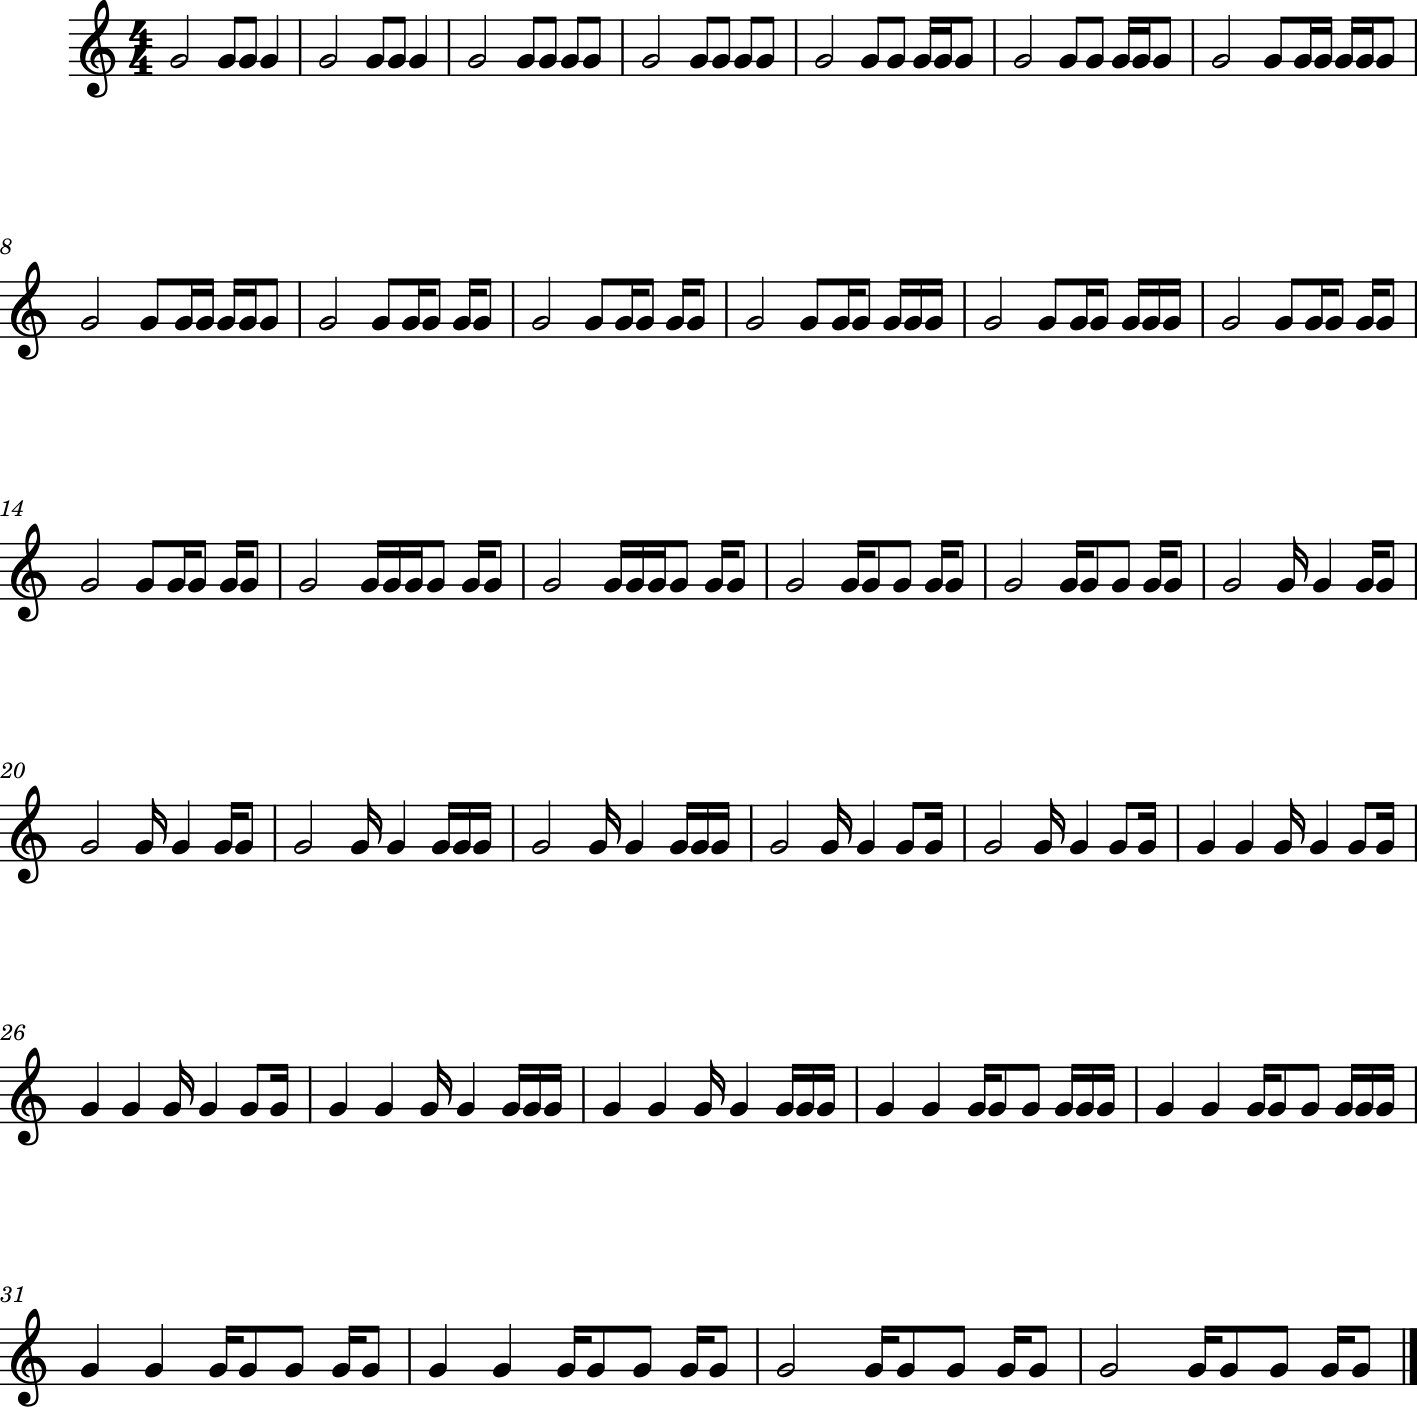

In [3]:
part = stream.Part()
s = stream.Stream([note.Note('G4', quarterLength=2), 
                   note.Note('G4', quarterLength=0.5), 
                   note.Note('G4', quarterLength=0.5),
                   note.Note('G4', quarterLength=1)])
part.append(s)
part.append(s.transpose(0))
for _ in range(16):
    s = modify_rhythm(s)
    part.append(s)
    part.append(s.transpose(0))
part.show()
part.show('midi')

In [4]:
percussion = instrument.BassDrum()
part.insert(0, percussion)
print(part.flat.notes[0].pitch.midi)
part.show('midi')
part.write('midi', 'rhythm.mid')

67


'rhythm.mid'

In [5]:
x = converter.parse('rhythm.mid')

In [6]:
for n in x.flat.notes:
    print(n)
print(type(x.flat))
for i in x.flat.getInstruments():
  print(repr(i))

<class 'music21.stream.base.Score'>
<music21.instrument.BassDrum 'Bass Drum: Bass Drum'>
<music21.instrument.UnpitchedPercussion 'Percussion'>
